### Overview:

A small startup is interested in developing a robust machine learning model that can successfully predict whether a customer will subscribe to a term deposit or not.

In order to acheive successful matric, We need to hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

Different models will be explored to determine whether the factors below could predict customers' subscription status.

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).



### Data wrangling:
### Import Packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Load data:

In [2]:
data = pd.read_csv("term-deposit-marketing-2020.csv")

### Explore the data:

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


### Cleaning, transforming and visualizing:

### Cleaning the data:

Let's have a closer look at the job,education and contact columns. their values need cleaning.

In [6]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
data["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [8]:
data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

There are some missing values in 'job', 'education' and 'contact'.
We have to replace 'unknown' by 'nan' in order to find the missing values.
imputation is needed here.

In [9]:
data.replace('unknown', np.nan, inplace = True)
data.isnull().sum()


age              0
job            235
marital          0
education     1531
default          0
balance          0
housing          0
loan             0
contact      12765
day              0
month            0
duration         0
campaign         0
y                0
dtype: int64

### Data Imputation:

In [10]:
data['job'].fillna(data['job'].value_counts().index[0], inplace=True)
data['education'].fillna(data['education'].value_counts().index[0], inplace=True)
data['contact'].fillna(data['contact'].value_counts().index[0], inplace=True)
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

We have umbalanced data (SMOTE Method is necessary)

Call replace() on the y column to replace 'yes' and 'no' by 1 and 0

In [11]:
data["y"] = data["y"].replace('yes', 1)
data["y"] = data["y"].replace('no', 0)
data['y'].unique()

array([0, 1])

#### Check the correlation for numerical features:

In [12]:
data.corr()["y"].sort_values(ascending=False)


y           1.000000
duration    0.461169
balance     0.030232
day        -0.006420
age        -0.020273
campaign   -0.040350
Name: y, dtype: float64

Duration feature has a strong positive correlation with the output.

### Checking distribution of numerical features:

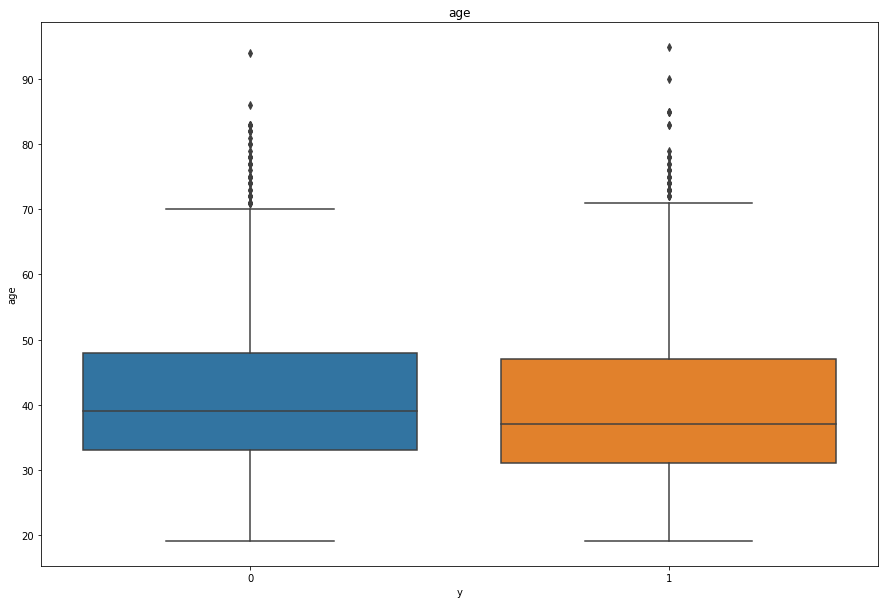

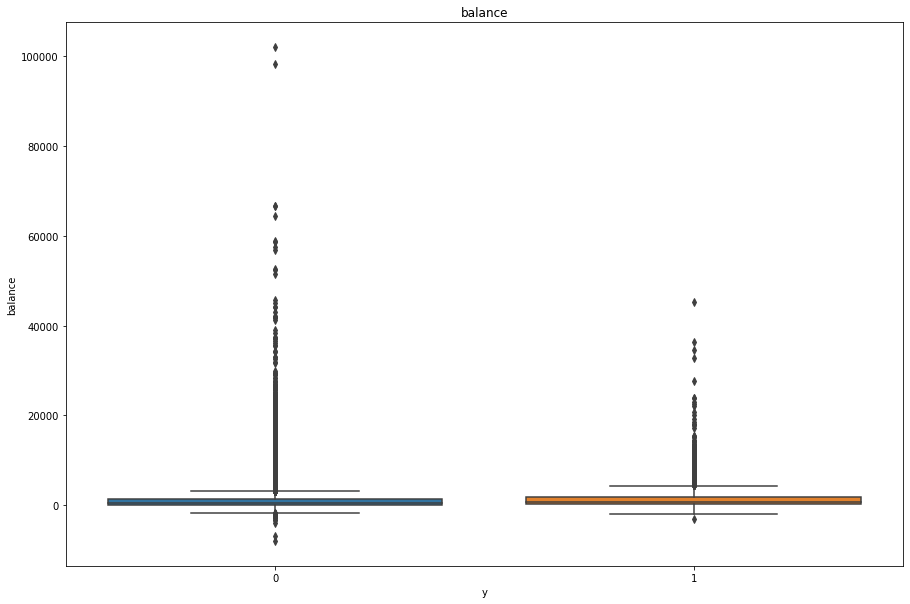

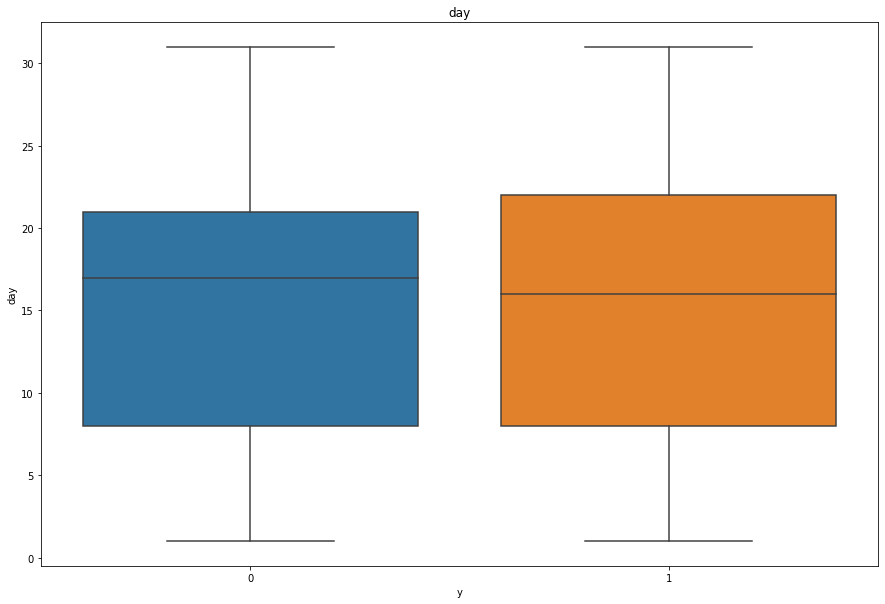

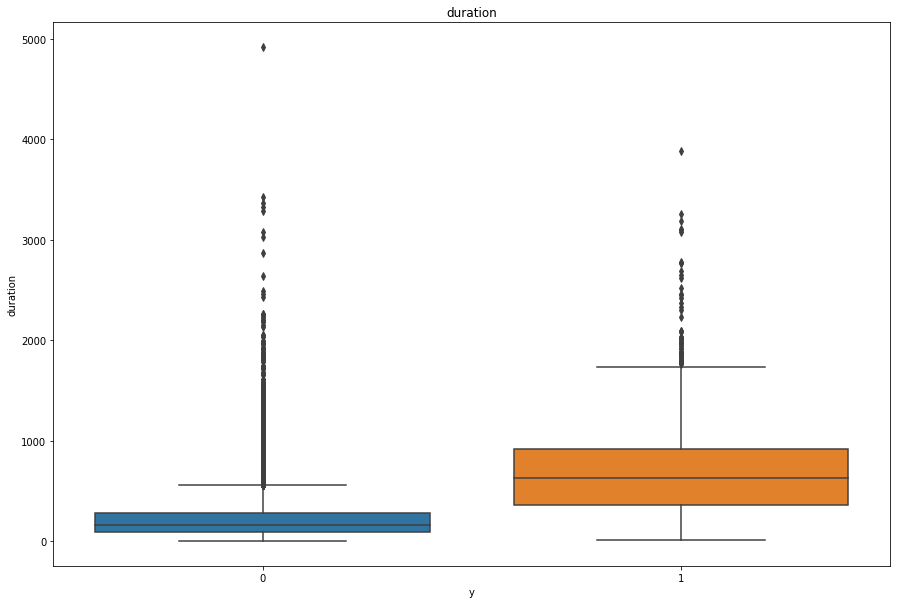

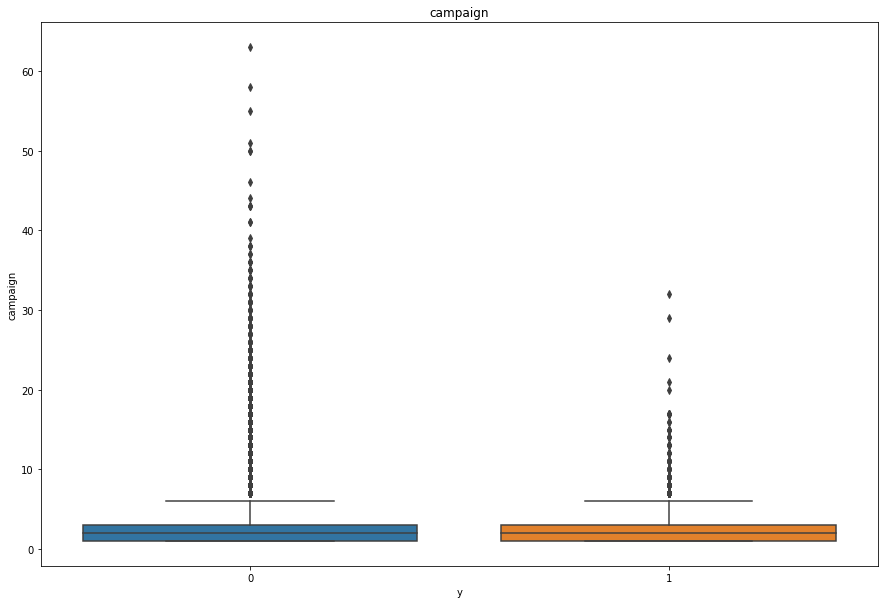

In [13]:
num_features = ['age', 'balance', 'day', 'duration', 'campaign']


for feature in num_features :
    plt.figure(figsize=(15,10))
    sns.boxplot(y=feature, x='y', data=data)
    plt.title(feature)
    plt.show()

In [14]:
data.groupby('y').mean()

,age,balance,day,duration,campaign
y,,,,,
0,40.599208,1249.752533,16.032072,221.408042,2.918688
1,39.844959,1588.495856,15.827003,682.958564,2.414365


- We noticed that the duration of a call plays a very important role on the subscription, As the longer a call lasts,the more likely the person is to subscribe to the term deposit.

- The average yearly balance for subscribers(1588 euro) is higher than non subscribers (1249 euro).



### Checking distribution of categorical features:

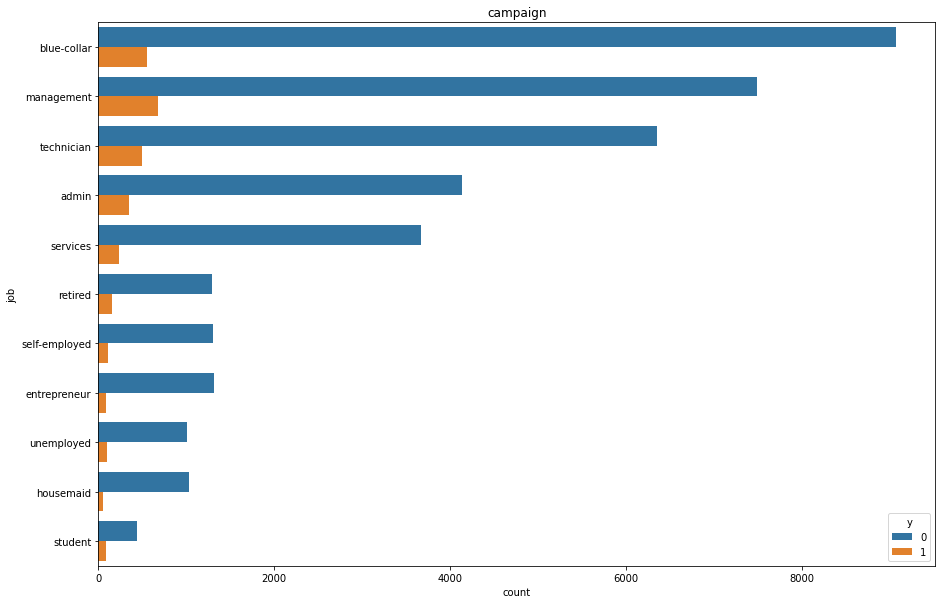

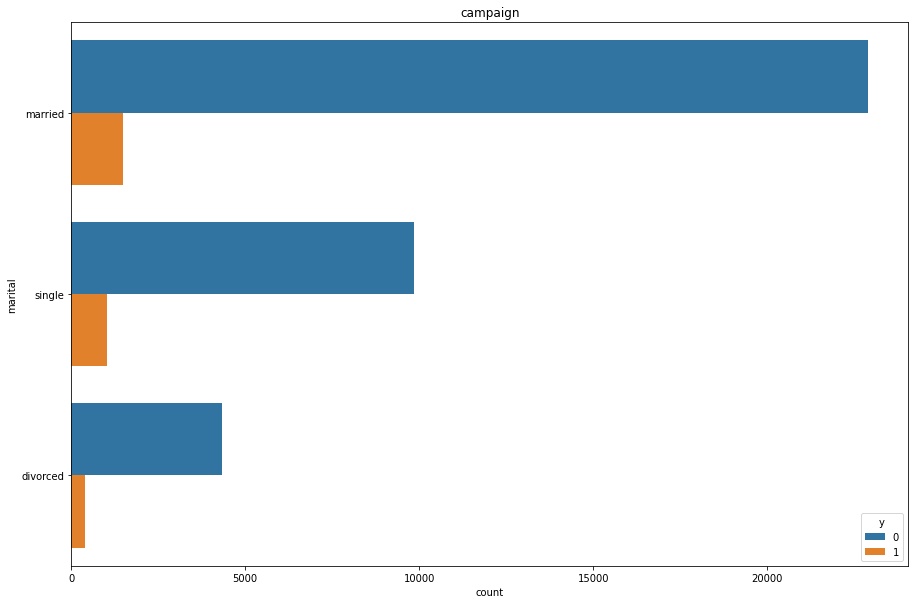

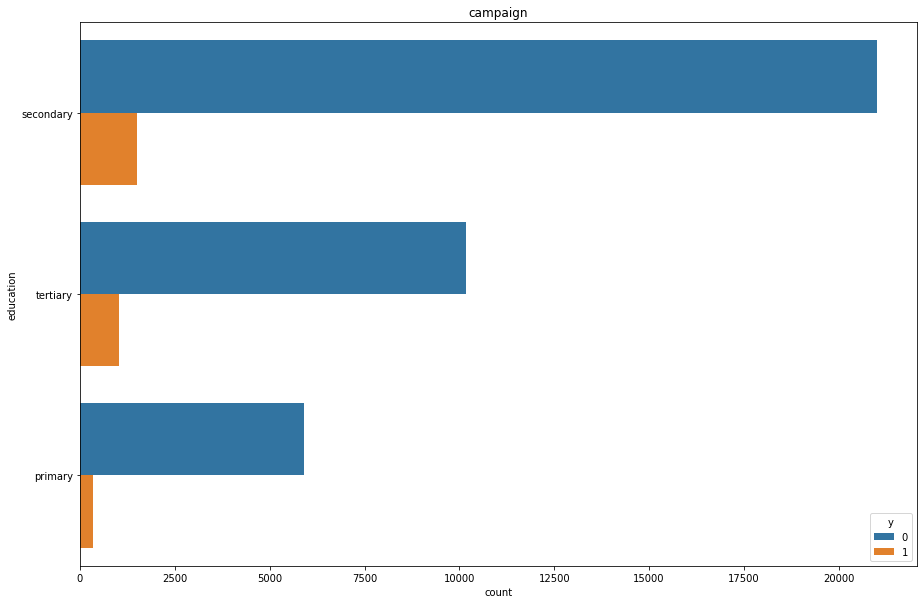

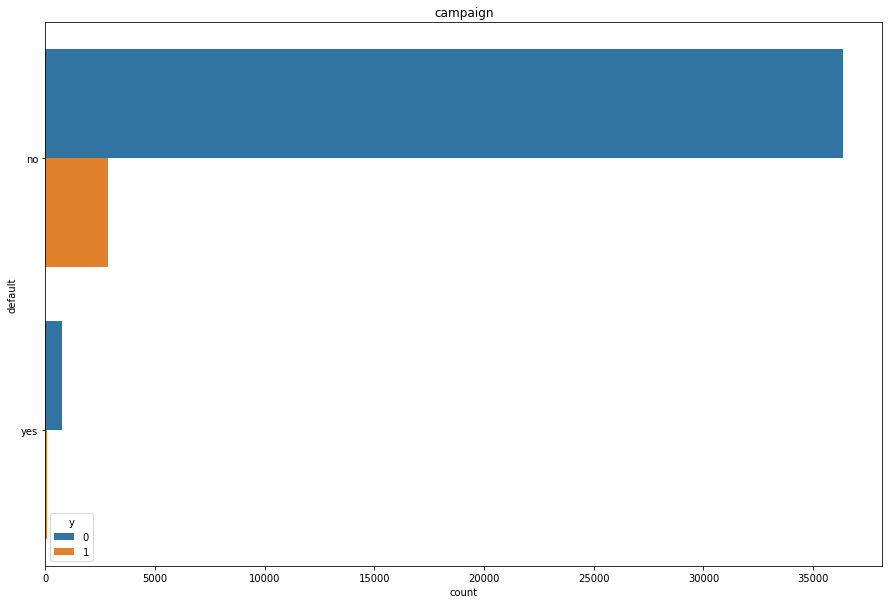

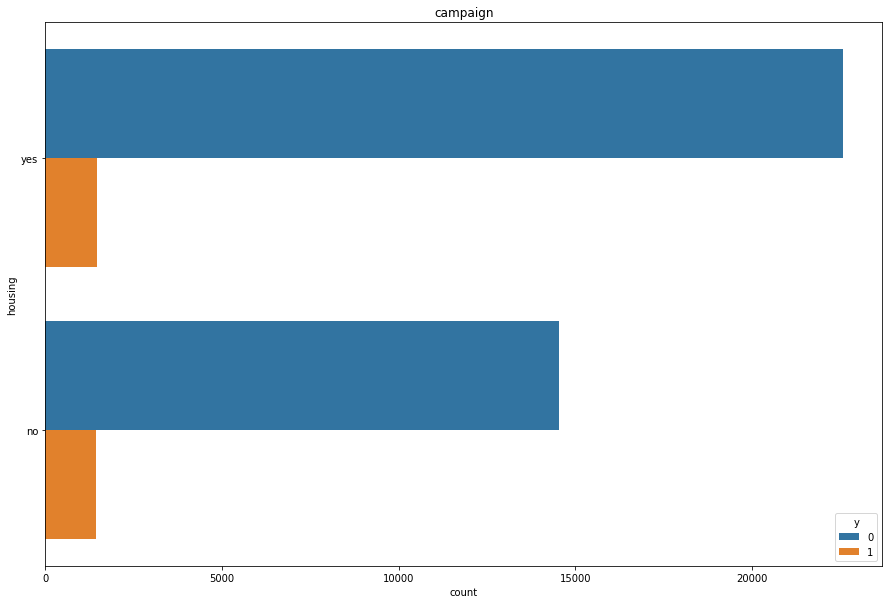

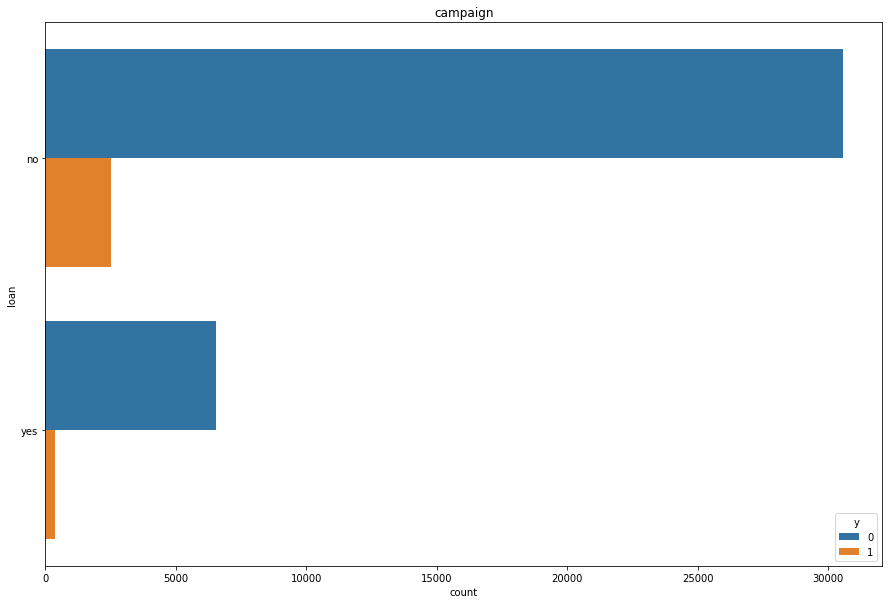

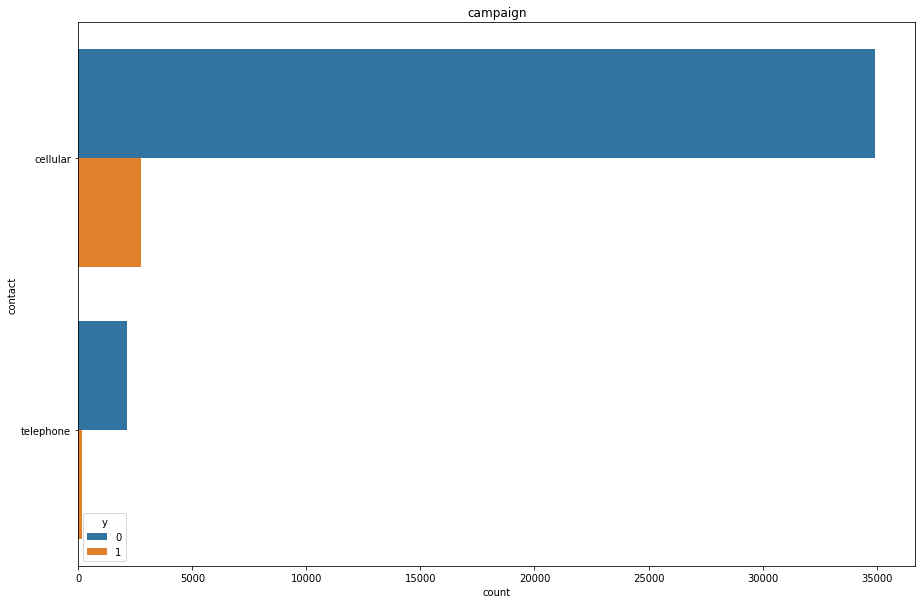

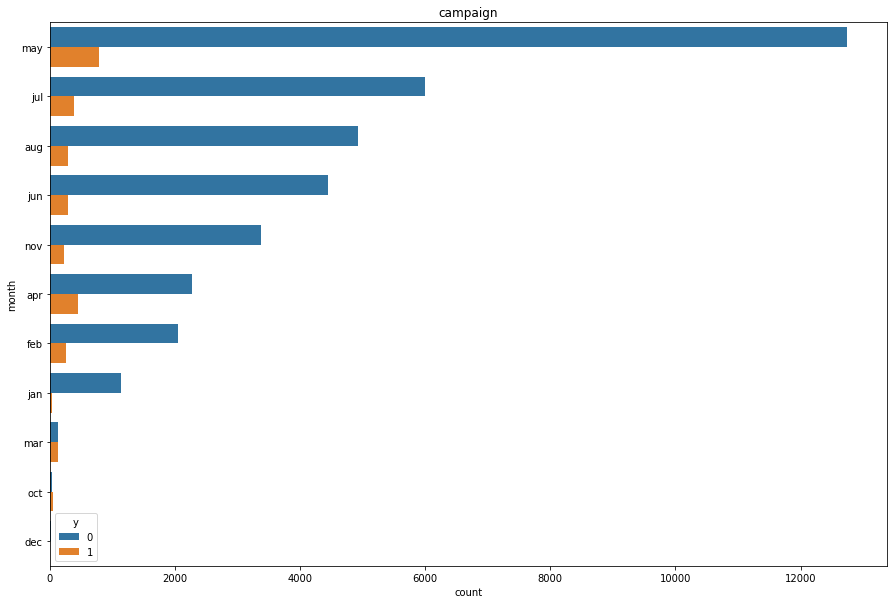

In [15]:
cat_features = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month']

for i in cat_features:
    plt.figure(figsize=(15,10))
    ax = plt.subplot(1, 1, 1)
    arr = sns.countplot(data=data, y=data[i], order=data[i].value_counts().index, hue='y')
    legend_labels, _= ax.get_legend_handles_labels()
    plt.title(feature)
    plt.show()


### Plot the ratio (subscribers percentage ):

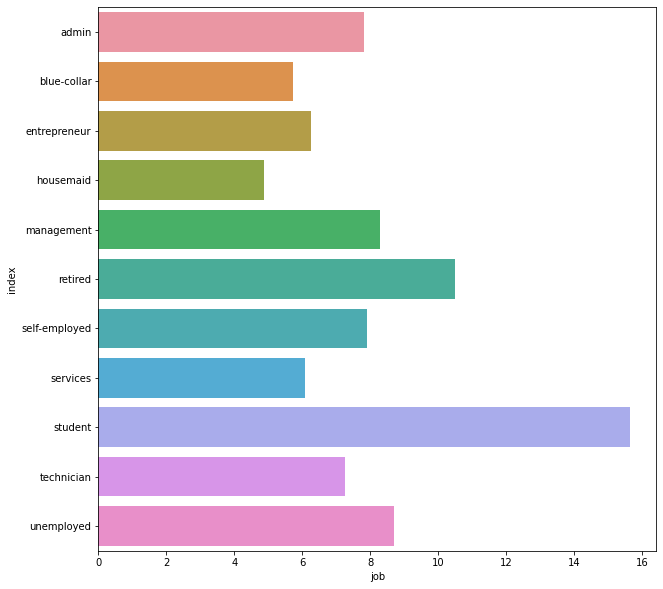

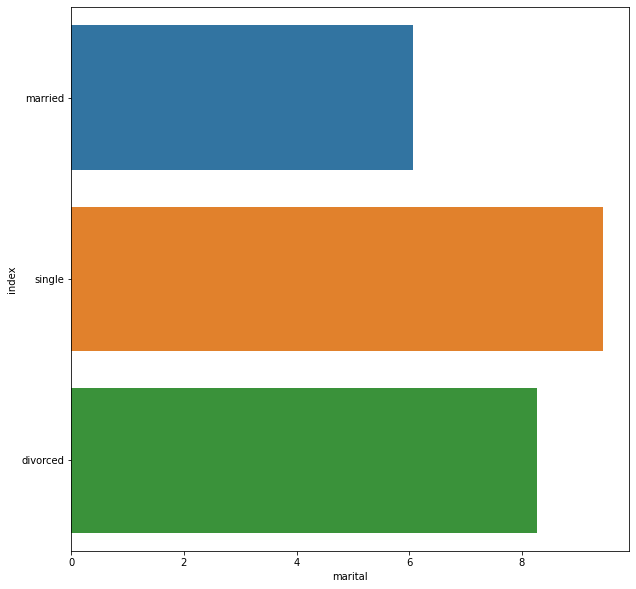

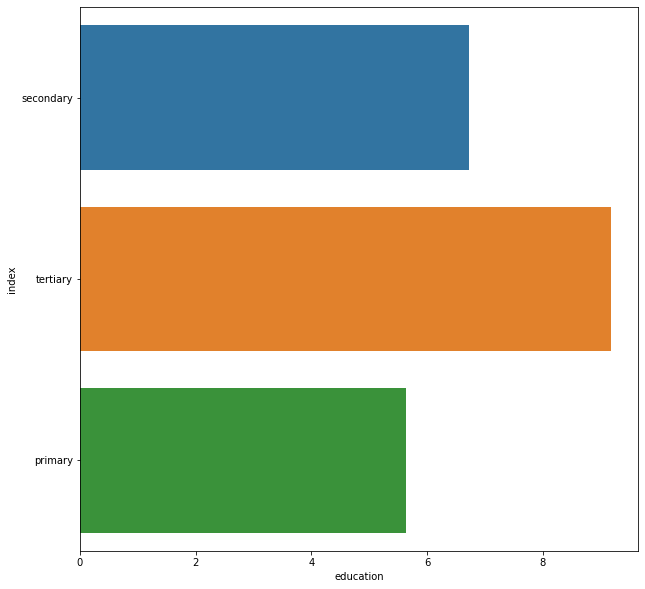

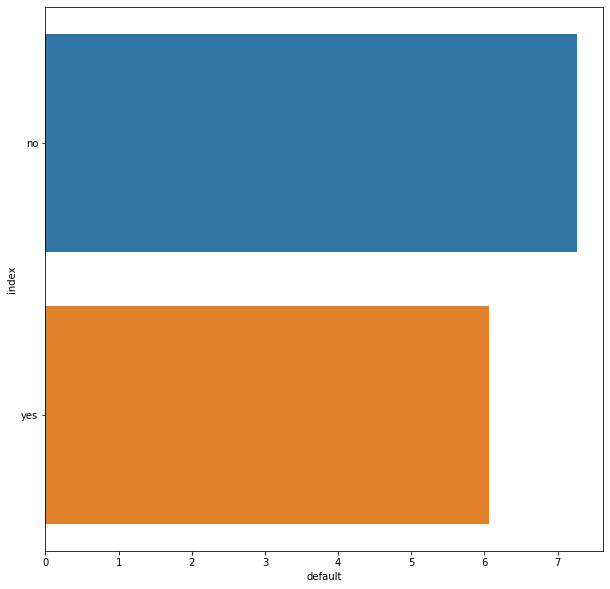

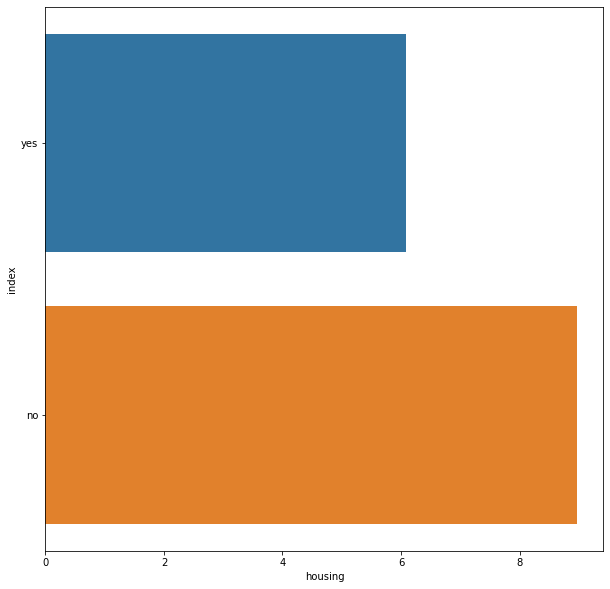

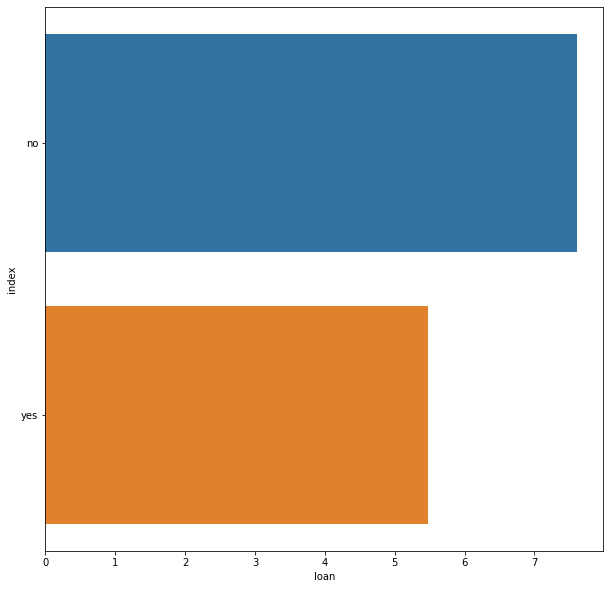

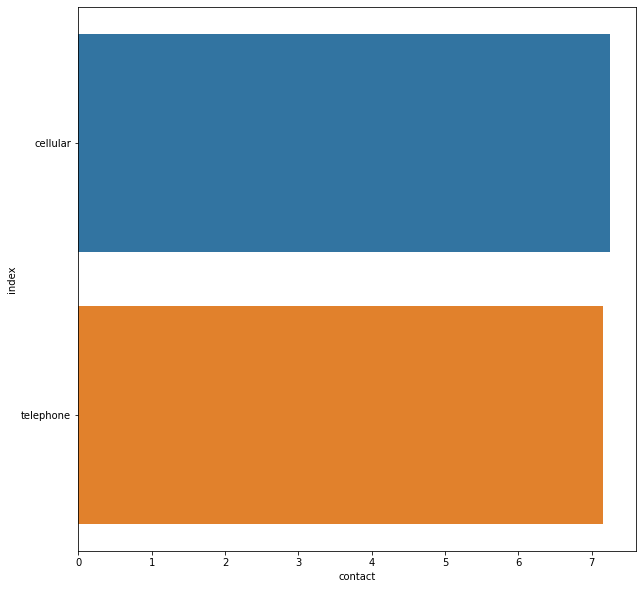

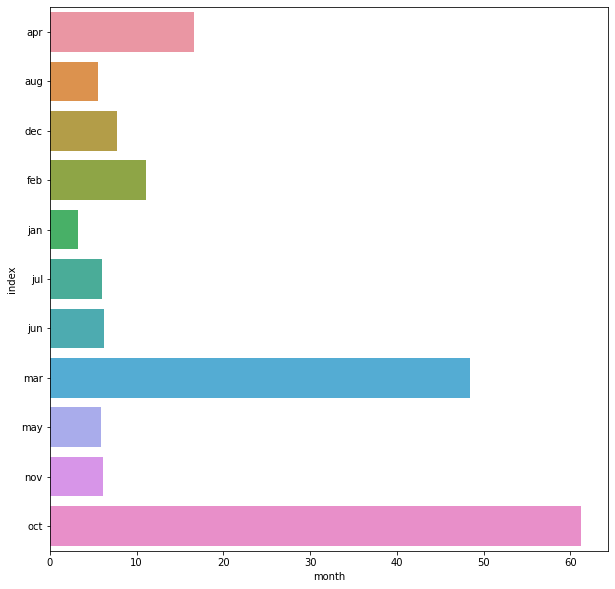

In [16]:
for i in cat_features:
    ratio = data[i].loc[(data.y == 1)].value_counts()/data[i].value_counts()*100
    ratio = ratio.reset_index()
    plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    sns.barplot(data=ratio, y='index', x=i)
    plt.show()

There are some differences with the customer segment we are targeting versus those who have subscribed.

- for instance for job feature we have:  
blue-collar( are the main target client) we noticed few subscribers among them (only 6%) 
students (are not our main target client) show a higher subscription percentage (almost 17.5%)

- for marital feature:
We should be focusing more on single and divorced customers rather than married ones.

- for month feature:

for September there were no calls made at all.
While most calls were made in May (over 13000 calls) with few subscribers (5% subscribed rate)

instead we should make more calls in October and March as they have the highest subscription rates (over 50%)

### Data Preprocessing:

After taking all in consideration, We will use different methods to adjust our data such as:
Imputation, Transformation, Remove large outliers.

### Balance our data:

SMOTE upsampling technique will be used to handle unbalanced data.

Converting categorical columns to numeric values using dictionary structure.

In [17]:
#First, store categorical variables and their unique values in dictionaries
L= [i for i in data.select_dtypes('object') ]
for i in L:
    a=0
    d={}
    for j in set(data[i]):
        d[j]=a
        a=a+1
    print ("dict_",i,"=",d,"\n")

dict_ job = {'entrepreneur': 0, 'self-employed': 1, 'technician': 2, 'retired': 3, 'services': 4, 'housemaid': 5, 'admin': 6, 'unemployed': 7, 'management': 8, 'blue-collar': 9, 'student': 10} 

dict_ marital = {'single': 0, 'divorced': 1, 'married': 2} 

dict_ education = {'primary': 0, 'secondary': 1, 'tertiary': 2} 

dict_ default = {'yes': 0, 'no': 1} 

dict_ housing = {'yes': 0, 'no': 1} 

dict_ loan = {'yes': 0, 'no': 1} 

dict_ contact = {'cellular': 0, 'telephone': 1} 

dict_ month = {'mar': 0, 'dec': 1, 'jul': 2, 'aug': 3, 'may': 4, 'oct': 5, 'nov': 6, 'feb': 7, 'apr': 8, 'jun': 9, 'jan': 10} 



In [18]:
# Creat dictionaries to store unique values of each category
dict_job = {'self-employed': 0, 'unemployed': 1, 'unknown': 2, 'entrepreneur': 3, 'admin': 4, 'technician': 5, 'management': 6, 'housemaid': 7, 'retired': 8, 'student': 9, 'services': 10, 'blue-collar': 11} 
dict_marital = {'married': 0, 'divorced': 1, 'single': 2} 
dict_education = {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3} 
dict_default = {'yes': 0, 'no': 1} 
dict_housing = {'yes': 0, 'no': 1} 
dict_loan = {'yes': 0, 'no': 1} 
dict_contact = {'cellular': 0, 'telephone': 1, 'unknown': 2} 
dict_month = {'jan': 0, 'feb': 1, 'oct': 2, 'aug': 3, 'jun': 4, 'dec': 5, 'mar': 6, 'nov': 7, 'may': 8, 'apr': 9, 'jul': 10} 

In [19]:
#change the values of categorical columns
data['job']=data['job'].map(dict_job) 
data['education']=data['education'].map(dict_education) 
data['marital']=data['marital'].map(dict_marital) 
data['loan']=data['loan'].map(dict_loan) 
data['contact']=data['contact'].map(dict_contact) 
data['month']=data['month'].map(dict_month) 
data['housing']=data['housing'].map(dict_housing) 
data['default']=data['default'].map(dict_default) 

In [20]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,5,0,2,1,395,1,1,0,3,4,107,1,0
39996,30,6,2,2,1,3340,1,1,0,3,4,238,3,1
39997,54,4,1,1,1,200,1,1,0,3,4,170,1,1
39998,34,6,0,2,1,1047,1,1,0,3,4,342,1,0
39999,38,5,0,1,1,1442,0,1,0,3,4,113,1,0


#### Split the dataset into train and test sets:


In [21]:
np.random.seed(1)
X=data.drop(['y'], axis=1) 
Y=data['y'] 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)

In [22]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 2331
Before OverSampling, counts of label '0': 29669 

After OverSampling, counts of label '1': 29669
After OverSampling, counts of label '0': 29669


In [23]:
x_train_res["target"]=y_train_res

In [24]:
train=x_train_res
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,target
0,33,5,2,1,1,268,1,1,0,19,3,255,1,0
1,41,11,2,1,1,98,1,0,0,21,10,97,6,0
2,27,4,2,1,1,116,1,1,0,30,0,46,1,0
3,35,10,0,1,1,0,0,1,0,5,8,471,1,0
4,46,5,1,2,1,147,0,1,0,12,8,189,1,0


In [25]:
X_test['target']=Y_test

<ipython-input-25-13652bd20bb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['target']=Y_test


In [26]:
test=X_test
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,target
3841,57,7,0,0,1,260,0,1,0,16,8,38,3,0
12898,49,11,0,0,0,-354,1,0,0,7,10,455,1,0
15032,37,0,0,1,0,0,0,1,0,17,10,158,1,0
36781,33,5,0,1,1,177,0,0,0,12,8,22,8,0
9201,40,1,0,1,1,1779,0,1,0,5,4,59,7,0


In [27]:
#store categorical values except the target y 
cat_features=data[['job','marital','education','default','housing','loan','contact','month']]

In [28]:
#with pycaret, you don't need to split your dataset, just define the splitting size as a parameter
df_pycaret=pd.concat([train,test], axis=0)
df_pycaret.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,target
0,33,5,2,1,1,268,1,1,0,19,3,255,1,0
1,41,11,2,1,1,98,1,0,0,21,10,97,6,0
2,27,4,2,1,1,116,1,1,0,30,0,46,1,0
3,35,10,0,1,1,0,0,1,0,5,8,471,1,0
4,46,5,1,2,1,147,0,1,0,12,8,189,1,0


#### **Plot heatmap for categorical features**:

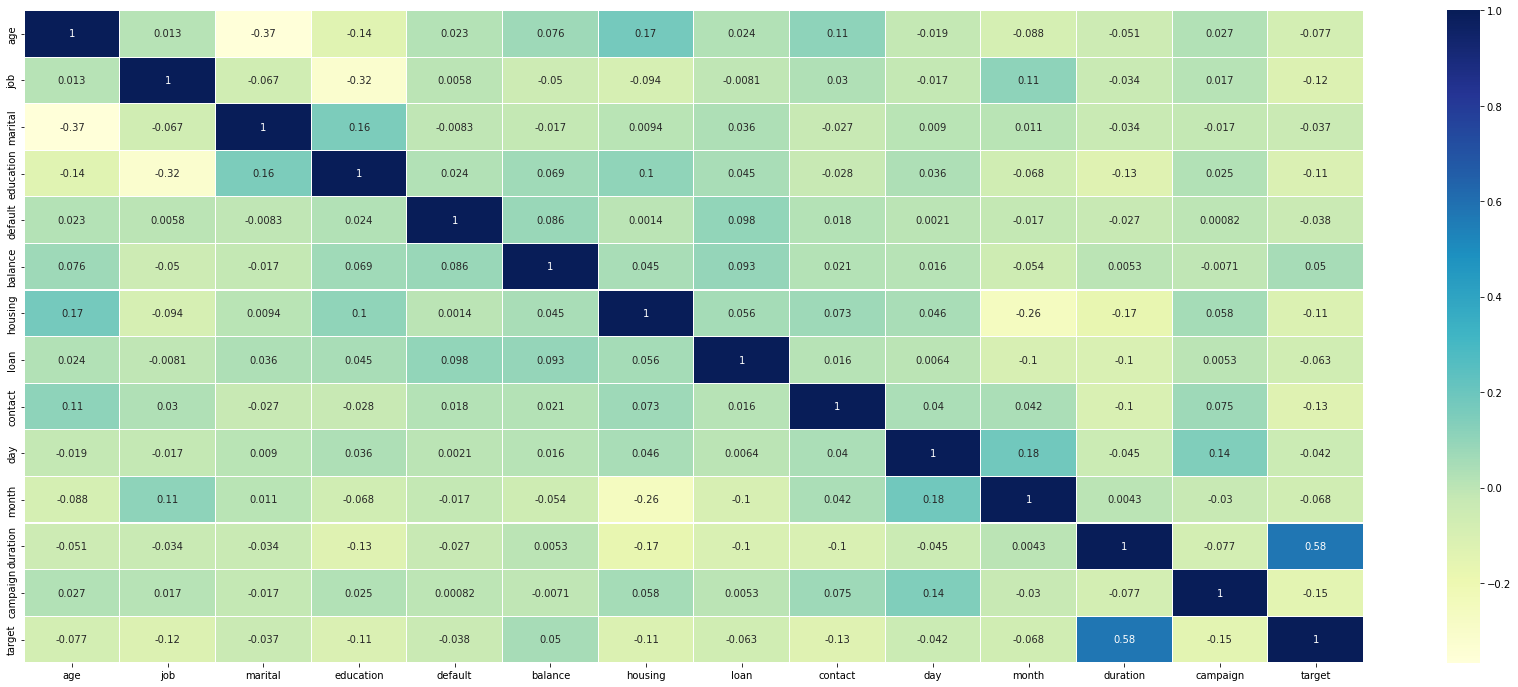

In [29]:
plt.figure(figsize=(30,12))
sns.heatmap(df_pycaret.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks();

Our data doesn't suffer from multicollinearity.

In [30]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!python3 -m pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from pycaret.classification import *  


experiment1= setup(df_pycaret, target = 'target', train_size = 0.8, session_id=122,remove_outliers = True)



,Description,Value
0,session_id,122
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(67338, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('rem_outliers',
                 Outlier(contamination=0.05, methods=['pca'], random_state=122,
                         target='target')),
                (

In [33]:
#The best model is going to be stored in the best_model variable
best_model=compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9353,0.9843,0.9380,0.9187,0.9282,0.8694,0.8696,8.261
et,Extra Trees Classifier,0.9260,0.9796,0.9131,0.9204,0.9167,0.8501,0.8502,8.058
lightgbm,Light Gradient Boosting Machine,0.9137,0.9739,0.9036,0.9031,0.9033,0.8254,0.8255,0.677
dt,Decision Tree Classifier,0.9022,0.9027,0.9070,0.8779,0.8922,0.8028,0.8031,0.469
gbc,Gradient Boosting Classifier,0.8837,0.9561,0.8547,0.8812,0.8677,0.7641,0.7644,8.628
knn,K Neighbors Classifier,0.8829,0.9445,0.9383,0.8238,0.8773,0.7663,0.7722,0.936
ada,Ada Boost Classifier,0.8706,0.9456,0.8272,0.8760,0.8508,0.7368,0.7378,2.602
lr,Logistic Regression,0.8638,0.9370,0.8128,0.8731,0.8419,0.7225,0.7240,10.509
lda,Linear Discriminant Analysis,0.8560,0.9358,0.7636,0.8983,0.8255,0.7042,0.7110,0.415
ridge,Ridge Classifier,0.8559,0.0000,0.7633,0.8984,0.8254,0.7041,0.7109,0.068


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=122, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [34]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9335,0.9847,0.9320,0.9199,0.9259,0.8655,0.8656
1,0.9350,0.9833,0.9360,0.9198,0.9278,0.8688,0.8689
2,0.9409,0.9840,0.9453,0.9241,0.9346,0.8807,0.8809
3,0.9354,0.9867,0.9316,0.9243,0.9279,0.8694,0.8694
4,0.9311,0.9829,0.9298,0.9168,0.9233,0.8607,0.8608
5,0.9388,0.9833,0.9461,0.9190,0.9323,0.8764,0.8767
6,0.9305,0.9837,0.9413,0.9065,0.9235,0.8599,0.8604
7,0.9380,0.9854,0.9386,0.9235,0.9310,0.8747,0.8748
8,0.9328,0.9843,0.9369,0.9147,0.9256,0.8644,0.8646


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=122, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [35]:
predictions=predict_model(rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=122, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9382,0.9848,0.9449,0.9189,0.9317,0.8753,0.8756


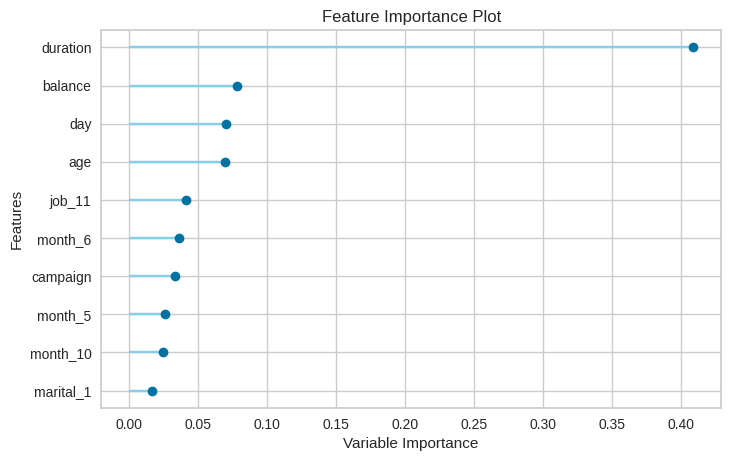

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
# See the feature importance 
plot_model(rf, plot='feature')

From the plot above we can infer that the duration is the most important feature in our dataset.
and the company must give more importance to the duration of calls.

In [37]:
save_model(rf,'TDM')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=122, verbose=0,
                       warm_start=False), model_name=TDM, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_feature

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

### **Shap:**

In [38]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import shap
from shap import TreeExplainer, Explanation
from shap import summary_plot
from shap.plots import waterfall

In [40]:
# Define a tree explainer for the built model
explainer = TreeExplainer(rf)

In [ ]:
sv = explainer(X)
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
idx = 0
waterfall(exp[idx])